## Adaline - Implementação e Teste do Algoritmo

Importação das Bibliotecas

In [32]:
from sklearn import preprocessing # Biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # Para visualizacao dos dados e do erro
import numpy as np # Biblioteca de manipulacao de arrays Numpy
from matplotlib.colors import ListedColormap # Lista de cores para plotagens
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Definição e Implementação da Classe Adaline

In [31]:
# Classe Adaline
class Adaline:
    # Construtor com informações setadas com o número de épocas máxima (epoch) e taxa de aprendizagem (eta)
    def __init__(self, eta = 0.001, epoch = 5000, goal = 0.000001):
        self.eta = eta # Taxa de aprendizagem, utilizada para impulsionar o movimento do hiperplano na separação de classes
        self.epoch = epoch # Determinação máxima de épocas no ajuste da RNA
        self.epochs = 0 # Contabilização do número de épocas no treinamento
        self.errorsTests = 0 # Utilizado para contabilizar a quantidade de amostras classificadas incorretamente nos testes da rede já treinada
        self.goal = goal # Definição do objetivo com parada definida no treinamento que é comparado com o cálculo do erro quadrático da época anterior com a atual

    # Método para treinamento da rede
    def fit(self, X, y):
        # Inicialização dos pesos randomicamente - shape retorna a dimensão das entradas da RNA
        self.weight_ = np.random.uniform(-1, 1, X.shape[1] + 1)
        self.error_ = []
        self.mse_ = []
        self.mse = 0
        self.cost = 0
        cont = 1

        for _ in range(self.epoch):
            # Obtenção da saída da rede baseada nos pesos sinápticos ajustados
            output = self.activation_function(X) # Valor do u
            # y é a saída desejada e output é a saída calculada, obtem-se um valor real
            error = y - output # verificação do erro

            # Ajuste do limiar de ativação
            self.weight_[0] += self.eta * sum(error)
            # Ajuste dos pesos sinápticos - Minimização do erro quadrático médio com a aplicação do gradiente do erro E(w)
            self.weight_[1:] += self.eta * X.T.dot(error) # dot efetua a multiplicação de matrizes, T calcula a transposta de X para poder efetuar a multiplicação segundo a regra - https://acervolima.com/diferenca-entre-a-operacao-numpy-dot-e-em-python/

            # Cálculo do erro quadrático E(w)
            self.cost = 1./2 * sum((error**2))

            # Armazena em mseP o mse da época anterior para poder comparar com o atual
            mseP = self.mse

            # Cálculo do erro quadrático médio mse(w) da época atual
            self.mse = 1./X.shape[0] * sum((error**2))

            # Atualização do número de épocas
            self.epochs += 1

            # Permite verificar a diferença do erro somente na segunda passagem
            if self.epochs > 1:
                # Verfica se a diferença entre o erro da época anterior com a atual é menor que o objetivo pré-determinado
                if  mseP-self.mse < self.goal:
                    break

            # Armazena os erros quadráticos e os erros quadráticos médios em listas
            self.error_.append(self.cost)
            self.mse_.append(self.mse)

        return self

    def net_input(self, X):
        # Calcula a entrada da rede por meio de um produto escalar (dot) dos valores de entrada com os pesos (Combinador Linear)
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def activation_function(self, X):
        # Função de ativação que recebe o retorno do cálculo do método net_input
        return self.net_input(X)

    def predict(self, X, y_d): # y_d = saída desejada utilizada para verificar a acurácia no teste
        # Obtenção da saída calculada baseada no conjunto de entradas calculado com os pesos ajustados obtenção final pautada na função de ativação
        y = np.where(self.activation_function(X) >= 0.0, 1, -1)

        # Verificação se a amostra testada apresentou erro na classificação
        if y != y_d:
            self.errorsTests = self.errorsTests + 1
            return 'Erro'
        return 'Acerto'

Carregamento do Dataset e Manipulação Inicial com Pandas e Numpy

In [8]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Adaline_atividade/valvulas.csv")

# Separando a coluna da classe das amostras do dataset
y = df.iloc[0:33, 4].values

# Separando as colunas com as variáveis das amostras do dataset para determinar os inputs
X = df.iloc[0:33, [0,1,2,3]].values

print(df)

    0.4329  -1.3719  0.7022  -0.8535  1.0000
0   0.3024   0.2286  0.8630   2.7909    -1.0
1   0.1349  -0.6445  1.0530   0.5687    -1.0
2   0.3374  -1.7163  0.3670  -0.6283    -1.0
3   1.1434  -0.0485  0.6637   1.2606     1.0
4   1.3749  -0.5071  0.4464   1.3009     1.0
5   0.7221  -0.7587  0.7681  -0.5592     1.0
6   0.4403  -0.8072  0.5154  -0.3129     1.0
7  -0.5231   0.3548  0.2538   1.5776    -1.0
8   0.3255  -2.0000  0.7112  -1.1209     1.0
9   0.5824   1.3915 -0.2291   4.1735    -1.0
10  0.1340   0.6081  0.4450   3.2230    -1.0
11  0.1480  -0.2988  0.4778   0.8649     1.0
12  0.7359   0.1869 -0.0872   2.3584     1.0
13  0.7115  -1.1469  0.3394   0.9573    -1.0
14  0.8251  -1.2840  0.8452   1.2382    -1.0
15  0.1569   0.3712  0.8825   1.7633     1.0
16  0.0033   0.6835  0.5389   2.8249    -1.0
17  0.4243   0.8313  0.2634   3.5855    -1.0
18  1.0490   0.1326  0.9138   1.9792     1.0
19  1.4276   0.5331 -0.0145   3.7286     1.0
20  0.5971   1.4865  0.2904   4.6069    -1.0
21  0.8475

Gráfico para Análise das Amostras por Variáveis

In [34]:
# Preparação dos Dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normaliza os dados

# Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

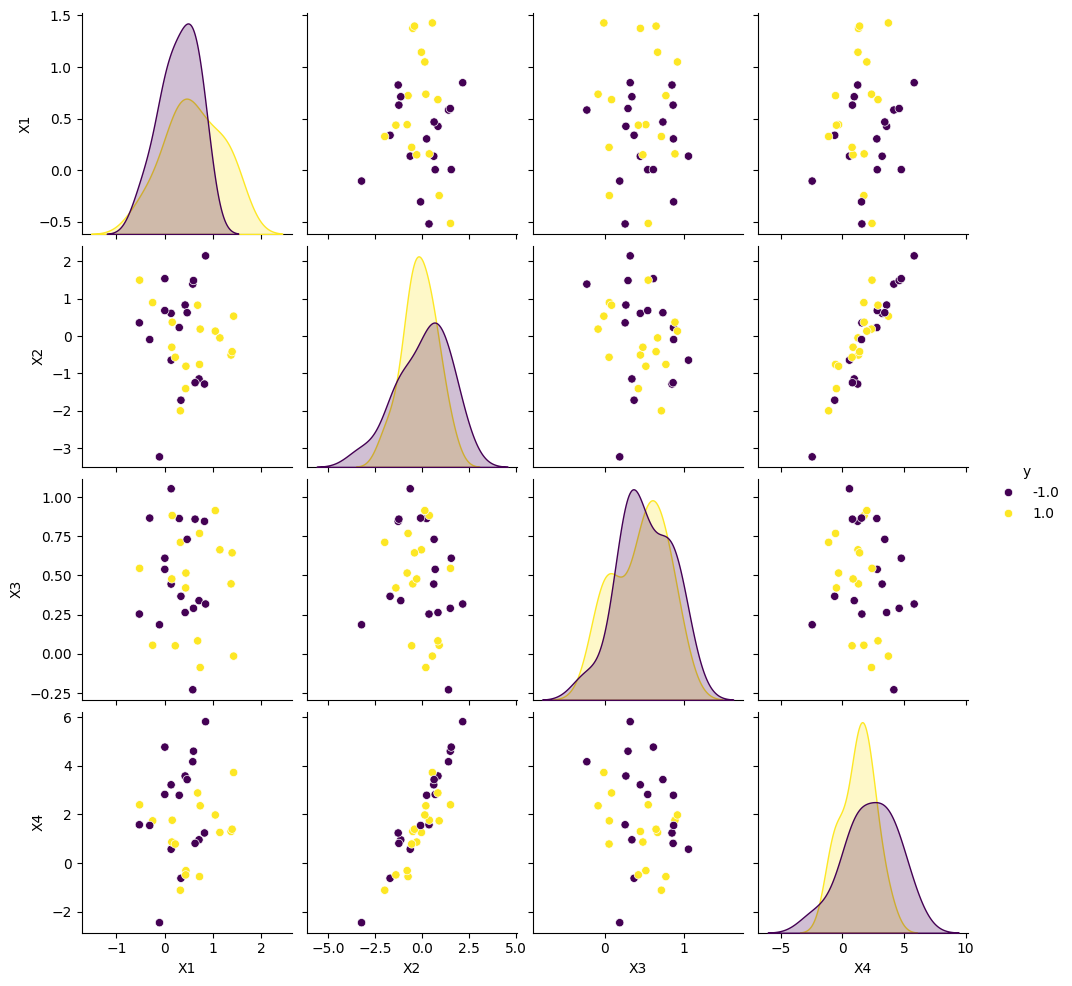

In [35]:
variaveis = ['X1', 'X2', 'X3', 'X4']
data = pd.DataFrame(X, columns=variaveis)
data['y'] = y

# Criando o pairplot
sns.pairplot(data, hue='y', palette='viridis')
plt.show()

Pré-Processamento para Normalizar os Dados e Separar Amostras para Treino e Teste

Treinamento da Rede Neural Artificial Adaline

In [36]:
# Criando as fronteiras de decisão com Adaline
rede = Adaline(eta = 0.001, epoch = 5000, goal = 0.000001)
rede.fit(X_train, y_train)

Apresentação Gráfica do Processo de Treinamento

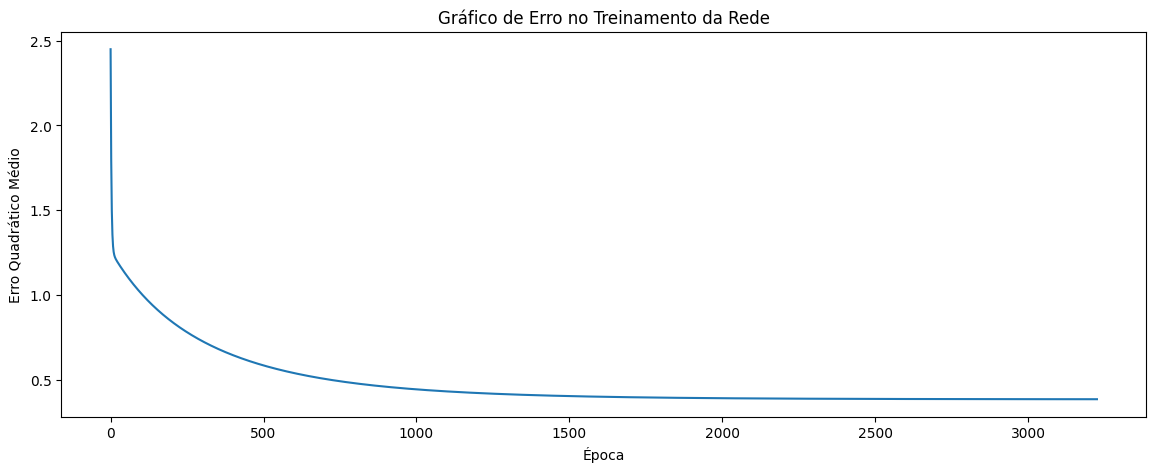

In [37]:
# Plotando o gráfico da descida do gradiente no processo de treinamento
plt.figure(figsize=(14,5))
ax = plt.subplot()
ax.plot(range(len(rede.mse_)), rede.mse_)
ax.set_ylabel('Erro Quadrático Médio')
ax.set_xlabel('Época')
ax.set_title('Gráfico de Erro no Treinamento da Rede')
plt.show()

Apresentação das Métricas do Processo de Treinamento e Validação

In [38]:
# Testando a rede em lote de amostras
print("\nClassificações dos testes com amostras não apresentadas no treinamento:")

# For entrada, saida in zip(X_test, y_test):
nTests = len(y_test)
for i in range(nTests):
    rede.predict(X_test[i,:], y_test[i])

print("Acurácia: ", (nTests-rede.errorsTests)/nTests*100, "%")
print("Quantidade de erros no teste em lote: ", rede.errorsTests)
print("Número de épocas do treinamento da RNA: ", rede.epochs)
print("Erro quadrático médio final (MSE - Eqm(w)): ", rede.mse)
print("Erro quadrático final (QE - E(w) - Custo): ", rede.cost)
print("Vetor de pesos finais da RNA treinada - Limiar = ", rede.weight_[0], "Pesos das entradas = ", rede.weight_[1:])


Classificações dos testes com amostras não apresentadas no treinamento:
Acurácia:  100.0 %
Quantidade de erros no teste em lote:  0
Número de épocas do treinamento da RNA:  3227
Erro quadrático médio final (MSE - Eqm(w)):  0.3845114885586786
Erro quadrático final (QE - E(w) - Custo):  4.421882118424804
Vetor de pesos finais da RNA treinada - Limiar =  1.9087132173954902 Pesos das entradas =  [ 1.15043155  1.62353491 -0.52319334 -1.18971001]


Teste de Amostras Isoladas no Modelo Treinado

In [39]:
A = np.array([0.9694,	0.6909,	0.4334,	3.4965]) # Padrão correto = -1
A_y = np.array(-1)
B = np.array([0.5427,	1.3832,	0.6390,	4.0352]) # Padrão correto = -1
B_y = np.array(-1)
C = np.array([0.6081,	-0.9196,	0.5925,	0.1016]) # Padrão correto = 1
C_y = np.array(1)
D = np.array([-0.1618,	0.4694,	0.2030,	3.0117]) # Padrão correto = -1
D_y = np.array(-1)
E = np.array([0.1870,	-0.2578,	0.6124,	1.7749]) # Padrão correto = -1
E_y = np.array(-1)
F = np.array([0.4891,	-0.5276,	0.4378,	0.6439]) # Padrão correto = 1
F_y = np.array(1)
G = np.array([0.3777,	2.0149,	0.7423,	3.3932]) # Padrão correto = 1
G_y = np.array(1)
H = np.array([1.1498,	-0.4067,	0.2469,	1.5866]) # Padrão correto = 1
H_y = np.array(1)
I = np.array([0.9325,	1.0950,	1.0359,	3.3591]) # Padrão correto = 1
I_y = np.array(1)
J = np.array([0.5060,	1.3317,	0.9222,	3.7174]) # Padrão correto = -1
J_y = np.array(-1)
K = np.array([0.0497,	-2.0656,	0.6124,	-0.6585]) # Padrão correto = -1
K_y = np.array(-1)
L = np.array([0.4004,	3.5369,	0.9766,	5.3532]) # Padrão correto = 1
L_y = np.array(1)
M = np.array([-0.1874,	1.3343,	0.5374,	3.2189]) # Padrão correto = -1
M_y = np.array(-1)
N = np.array([0.5060,	1.3317,	0.9222,	3.7174]) # Padrão correto = -1
N_y = np.array(-1)
O = np.array([1.6375,	-0.7911,	0.7537,	0.5515]) # Padrão correto = 1
O_y = np.array(1)

print("Apresentação dos testes individuais:")
print("Amostra A - Padrão desejado = -1 -> ", rede.predict(A, A_y))
print("Amostra B - Padrão desejado = -1 -> ", rede.predict(B, B_y))
print("Amostra C - Padrão desejado = 1 -> ", rede.predict(C, C_y))
print("Amostra D - Padrão desejado = -1 -> ", rede.predict(D, D_y))
print("Amostra E - Padrão desejado = -1 -> ", rede.predict(E, E_y))
print("Amostra F - Padrão desejado = 1 -> ", rede.predict(F, F_y))
print("Amostra G - Padrão desejado = 1 -> ", rede.predict(G, G_y))
print("Amostra H - Padrão desejado = 1 -> ", rede.predict(H, H_y))
print("Amostra I - Padrão desejado = 1 -> ", rede.predict(I, I_y))
print("Amostra J - Padrão desejado = -1 -> ", rede.predict(J, J_y))
print("Amostra K - Padrão desejado = -1 -> ", rede.predict(K, K_y))
print("Amostra L - Padrão desejado = 1 -> ", rede.predict(L, L_y))
print("Amostra M - Padrão desejado = -1 -> ", rede.predict(M, M_y))
print("Amostra N - Padrão desejado = -1 -> ", rede.predict(N, N_y))
print("Amostra O - Padrão desejado = 1 -> ", rede.predict(O, O_y))


Apresentação dos testes individuais:
Amostra A - Padrão desejado = -1 ->  Acerto
Amostra B - Padrão desejado = -1 ->  Acerto
Amostra C - Padrão desejado = 1 ->  Acerto
Amostra D - Padrão desejado = -1 ->  Acerto
Amostra E - Padrão desejado = -1 ->  Acerto
Amostra F - Padrão desejado = 1 ->  Acerto
Amostra G - Padrão desejado = 1 ->  Acerto
Amostra H - Padrão desejado = 1 ->  Acerto
Amostra I - Padrão desejado = 1 ->  Acerto
Amostra J - Padrão desejado = -1 ->  Acerto
Amostra K - Padrão desejado = -1 ->  Acerto
Amostra L - Padrão desejado = 1 ->  Acerto
Amostra M - Padrão desejado = -1 ->  Acerto
Amostra N - Padrão desejado = -1 ->  Acerto
Amostra O - Padrão desejado = 1 ->  Acerto
